HSV からRGBへ

In [ ]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [ ]:
#HSV形式からRGB形式に変換
#R=0~255, G=0~255, B=0~255,
def hsv2rgb(h,s,v):
  # h = 0~360
  # s = 0~255
  # v = 0~255
  i = int(h / 60.0)
  mx = v
  mn = v - ((s / 255.0) * v)
  if h is None:
    return(0,0,0)
  else:
    if i == 0:
          (r,g,b) = (mx,(h/60.0)*(mx-mn)+mn,mn)
    elif i == 1:
        (r,g,b) = (((120.0-h)/60.0)*(mx-mn)+mn,mx,mn)
    elif i == 2:
        (r,g,b) = (mn,mx,((h-120.0)/60.0)*(mx-mn)+mn)
    elif i == 3:
        (r,g,b) = (mn,((240.0-h)/60.0)*(mx-mn)+mn,mx)
    elif i == 4:
        (r,g,b) = (((h-240.0)/60.0)*(mx-mn)+mn,mn,mx)
    elif i >= 5:
        (r,g,b) = (mx,mn,((360.0-h)/60.0)*(mx-mn)+mn)
    return (int(r), int(g), int(b))

長方形の正方形、正方形の長方形による分割

In [ ]:
def Rect_wb(xPos,yPos,wd,ht,clock):
  val = clock%2
  if (val==0):
    col = hsv2rgb(0, 0, 255)
  if (val==1):
    col = hsv2rgb(0, 255, 0)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=0)

def divSquare_wb(xPos,yPos,w,r,thr,clock,clock_max):
  itr=0
  ws=w
  xEndPos=xPos+w
  yEndPos=yPos+w
  if clock<clock_max and w>=thr:
    Rect_wb(xPos,yPos,w,w,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws*r<xEndPos+0.1 and clock<clock_max:
        divRect_wb(xPos,yPos,ws*r,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=ws*r
      ws=xEndPos-xPos
    else:
      while yPos+(ws/r)<yEndPos+0.1 and clock<clock_max:
        divRect_wb(xPos,yPos,ws,ws/r,r,thr,clock,clock_max)
        clock+=1
        yPos+=ws/r
      ws=yEndPos-yPos

def divRect_wb(xPos,yPos,w,h,r,thr,clock,clock_max):
  itr=0
  ws=h
  xEndPos=xPos+w
  yEndPos=yPos+h
  if clock<clock_max and h>=thr and w>=thr:
    Rect_wb(xPos,yPos,w,h,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws<xEndPos+0.1 and clock<clock_max:
        divSquare_wb(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=ws
      ws=xEndPos-xPos
    else:
      while yPos+ws<yEndPos+0.1 and clock<clock_max:
        divSquare_wb(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        yPos+=ws
      ws=yEndPos-yPos

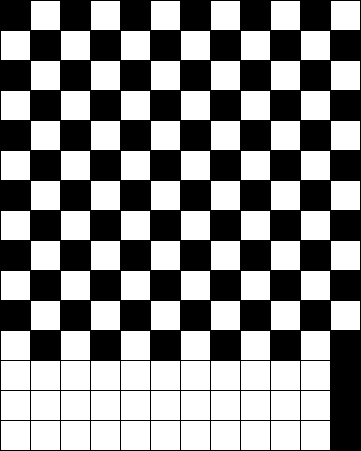

In [ ]:
thrs=[29.9,29.9,29.9,59.9,79.9,79.9,79.9,59.9,29.9,29.9,29.9]
W=360
H=450
i=11
r=i/12
if i==7:
  r=2
if i==8:
  r=3
if i==9:
  r=4
if i==10:
  r=6
if i==11:
  r=12

thr=thrs[i-1]
clock=0
clock_max=30
im = Image.new('RGB', (W+1, H+1), color=hsv2rgb(128, 128, 128))
draw = ImageDraw.Draw(im)
divRect_wb(0,0,W,H,r,thr,clock,clock_max)
draw.rectangle((0,360,360,450), fill=(0,0,0), outline=hsv2rgb(0, 255, 0),width=0)
draw.rectangle((0,360,30*i,450), fill=(255,255,255), outline=hsv2rgb(0, 255, 0),width=0)

for i in range(0,16,1):
  h=30*i
  draw.line((0, 30*i,360, 30*i), fill=(0, 0, 0), width=1)
for j in range(0,13,1):
  h=30*i
  draw.line((30*j,0,30*j, 450), fill=(0, 0, 0), width=1)
im

In [ ]:
def Rect_ay(xPos,yPos,wd,ht,clock):
  val = clock%5
  if (val==0):
    col = (239, 103, 128)
    col=hsv2rgb(0, 255, 200)
  if (val==1):
    col = (165, 86, 139)
  if (val==2):
    col = (65,49, 165)
  if (val==3):
    col = (239, 98, 98)
  if (val==4):
    col = (255,157,0)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

def Rect_asa(xPos,yPos,wd,ht,clock):
  val = clock%4
  if (val==0):
    col = (255,157,0)
  if (val==1):
    col = (255, 255, 255)
  if (val==2):
    col = (255, 240, 0)
  if (val==3):
    col = hsv2rgb(0, 255, 255)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

def Rect_hiru(xPos,yPos,wd,ht,clock):
  val = clock%5
  if (val==0):
    col = (255, 235, 124)
  if (val==1):
    col = (255, 252, 187)
  if (val==2):
    col = (255,255, 0)
  if (val==3):
    col = (255, 255, 132)
  if (val==4):
    col = (255, 255, 255)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

def Rect_yoru(xPos,yPos,wd,ht,clock):
  val = clock%5
  if (val==0):
    col = hsv2rgb(240, 255, 255)
  if (val==1):
    col = hsv2rgb(60, 255, 255)
  if (val==2):
    col = hsv2rgb(240, 255, 200)
  if (val==3):
    col = (255, 254, 152)
  if (val==4):
    col = (255, 162, 34)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

def Rect_yuu(xPos,yPos,wd,ht,clock):
  val = clock%5
  if (val==0):
    col = (242, 68, 5)
  if (val==1):
    col=hsv2rgb(0, 255, 255)
  if (val==2):
    col = (255,144, 0)
  if (val==3):
    col = hsv2rgb(0, 255, 220)
  if (val==4):
    col = (255, 254, 152)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)



In [ ]:
def divSquare1(xPos,yPos,w,r,thr,clock,clock_max):
  itr=0
  ws=w
  xEndPos=xPos+w
  yEndPos=yPos+w
  if clock<clock_max and w>=thr:
    Rect_ay(xPos,yPos,w,w,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws*r<xEndPos+0.1 and clock<clock_max:
        divRect1(xPos,yPos,ws*r,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=int(ws*r)
      ws=xEndPos-xPos
    else:
      while yPos+(ws/r)<yEndPos+0.1 and clock<clock_max:
        divRect1(xPos,yPos,ws,ws/r,r,thr,clock,clock_max)
        clock+=1
        yPos+=int(ws/r)
      ws=yEndPos-yPos

def divRect1(xPos,yPos,w,h,r,thr,clock,clock_max):
  itr=0
  ws=h
  xEndPos=xPos+w
  yEndPos=yPos+h
  if clock<clock_max and h>=thr and w>=thr:
    Rect_ay(xPos,yPos,w,h,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws<xEndPos+0.1 and clock<clock_max:
        divSquare1(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=ws
      ws=xEndPos-xPos
    else:
      while yPos+ws<yEndPos+0.1 and clock<clock_max:
        divSquare1(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        yPos+=ws
      ws=yEndPos-yPos

def divSquare2(xPos,yPos,w,r,thr,clock,clock_max):
  itr=0
  ws=w
  xEndPos=xPos+w
  yEndPos=yPos+w
  if clock<clock_max and w>=thr:
    Rect_asa(xPos,yPos,w,w,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws*r<xEndPos+0.1 and clock<clock_max:
        divRect2(xPos,yPos,ws*r,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=int(ws*r)
      ws=xEndPos-xPos
    else:
      while yPos+(ws/r)<yEndPos+0.1 and clock<clock_max:
        divRect2(xPos,yPos,ws,ws/r,r,thr,clock,clock_max)
        clock+=1
        yPos+=int(ws/r)
      ws=yEndPos-yPos

def divRect2(xPos,yPos,w,h,r,thr,clock,clock_max):
  itr=0
  ws=h
  xEndPos=xPos+w
  yEndPos=yPos+h
  if clock<clock_max and h>=thr and w>=thr:
    Rect_asa(xPos,yPos,w,h,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws<xEndPos+0.1 and clock<clock_max:
        divSquare2(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=ws
      ws=xEndPos-xPos
    else:
      while yPos+ws<yEndPos+0.1 and clock<clock_max:
        divSquare2(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        yPos+=ws
      ws=yEndPos-yPos

def divSquare3(xPos,yPos,w,r,thr,clock,clock_max):
  itr=0
  ws=w
  xEndPos=xPos+w
  yEndPos=yPos+w
  if clock<clock_max and w>=thr:
    Rect_hiru(xPos,yPos,w,w,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws*r<xEndPos+0.1 and clock<clock_max:
        divRect3(xPos,yPos,ws*r,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=int(ws*r)
      ws=xEndPos-xPos
    else:
      while yPos+(ws/r)<yEndPos+0.1 and clock<clock_max:
        divRect3(xPos,yPos,ws,ws/r,r,thr,clock,clock_max)
        clock+=1
        yPos+=int(ws/r)
      ws=yEndPos-yPos

def divRect3(xPos,yPos,w,h,r,thr,clock,clock_max):
  itr=0
  ws=h
  xEndPos=xPos+w
  yEndPos=yPos+h
  if clock<clock_max and h>=thr and w>=thr:
    Rect_hiru(xPos,yPos,w,h,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws<xEndPos+0.1 and clock<clock_max:
        divSquare3(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=ws
      ws=xEndPos-xPos
    else:
      while yPos+ws<yEndPos+0.1 and clock<clock_max:
        divSquare3(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        yPos+=ws
      ws=yEndPos-yPos

def divSquare4(xPos,yPos,w,r,thr,clock,clock_max):
  itr=0
  ws=w
  xEndPos=xPos+w
  yEndPos=yPos+w
  if clock<clock_max and w>=thr:
    Rect_yuu(xPos,yPos,w,w,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws*r<xEndPos+0.1 and clock<clock_max:
        divRect4(xPos,yPos,ws*r,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=int(ws*r)
      ws=xEndPos-xPos
    else:
      while yPos+(ws/r)<yEndPos+0.1 and clock<clock_max:
        divRect4(xPos,yPos,ws,ws/r,r,thr,clock,clock_max)
        clock+=1
        yPos+=int(ws/r)
      ws=yEndPos-yPos

def divRect4(xPos,yPos,w,h,r,thr,clock,clock_max):
  itr=0
  ws=h
  xEndPos=xPos+w
  yEndPos=yPos+h
  if clock<clock_max and h>=thr and w>=thr:
    Rect_yuu(xPos,yPos,w,h,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws<xEndPos+0.1 and clock<clock_max:
        divSquare4(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=ws
      ws=xEndPos-xPos
    else:
      while yPos+ws<yEndPos+0.1 and clock<clock_max:
        divSquare4(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        yPos+=ws
      ws=yEndPos-yPos

def divSquare5(xPos,yPos,w,r,thr,clock,clock_max):
  itr=0
  ws=w
  xEndPos=xPos+w
  yEndPos=yPos+w
  if clock<clock_max and w>=thr:
    Rect_yoru(xPos,yPos,w,w,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws*r<xEndPos+0.1 and clock<clock_max:
        divRect5(xPos,yPos,ws*r,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=int(ws*r)
      ws=xEndPos-xPos
    else:
      while yPos+(ws/r)<yEndPos+0.1 and clock<clock_max:
        divRect5(xPos,yPos,ws,ws/r,r,thr,clock,clock_max)
        clock+=1
        yPos+=int(ws/r)
      ws=yEndPos-yPos

def divRect5(xPos,yPos,w,h,r,thr,clock,clock_max):
  itr=0
  ws=h
  xEndPos=xPos+w
  yEndPos=yPos+h
  if clock<clock_max and h>=thr and w>=thr:
    Rect_yoru(xPos,yPos,w,h,clock)
    clock+=1
  while ws>thr and clock<clock_max:
    itr+=1
    if itr%2==1:
      while xPos+ws<xEndPos+0.1 and clock<clock_max:
        divSquare5(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        xPos+=ws
      ws=xEndPos-xPos
    else:
      while yPos+ws<yEndPos+0.1 and clock<clock_max:
        divSquare5(xPos,yPos,ws,r,thr,clock,clock_max)
        clock+=1
        yPos+=ws
      ws=yEndPos-yPos


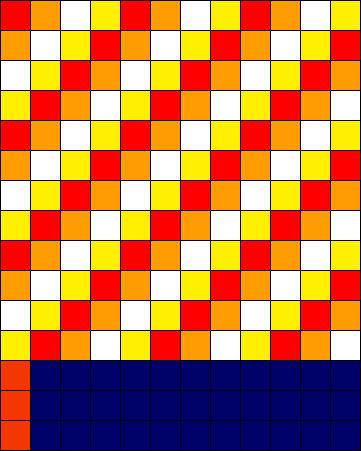

In [ ]:
thrs=[29.9,29.9,29.9,59.9,79.9,79.9,79.9,59.9,29.9,29.9,29.9]
W=360
H=450

i=1
r=i/12
if i==7:
  r=2
if i==8:
  r=3
if i==9:
  r=4
if i==10:
  r=6
if i==11:
  r=12

thr=thrs[i-1]
clock=0
clock_max=30
im = Image.new('RGB', (W+1, H+1), color=hsv2rgb(128, 128, 128))
draw = ImageDraw.Draw(im)
divRect2(0,0,W,H,r,thr,clock,clock_max)
draw.rectangle((0,360,360,450), fill=hsv2rgb(240,255,105), outline=hsv2rgb(0, 255, 0),width=0)
draw.rectangle((0,360,30*i,450), fill=(244,55,0), outline=hsv2rgb(240, 255, 255),width=0)

for i in range(0,16,1):
  h=30*i
  draw.line((0, 30*i,360, 30*i), fill=(0, 0, 0), width=1)
for j in range(0,13,1):
  h=30*i
  draw.line((30*j,0,30*j, 450), fill=(0, 0, 0), width=1)
im

キネティックウォール動画の作成

In [ ]:
from PIL import Image, ImageDraw, ImageFont
thrs=[29.9,29.9,29.9,59.9,79.9,79.9,79.9,59.9,29.9,29.9,29.9]

W=360
H=450
ims=[]
Lx=1920
Ly=1080

for i in range(0,60,1):
  j=i//5
  r=j/12
  clock=0
  clock_max=30
  if j==0:
    r=1/2
    clock_max=1
  if j==7:
    r=2
    clock=1
  if j==8:
    r=3
    clock=1
  if j==9:
    r=4
    clock=1
  if j==10:
    r=6
    clock=1
  if j==11:
    r=12
    clock=1

  im = Image.new('RGB', (Lx, Ly), (0, 0, 0))
  draw = ImageDraw.Draw(im)
  thr=thrs[j-1]
  divRect1(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((0,W,W,H), fill=hsv2rgb(240,255,105), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((0,W,30*j,H), fill=(242,121,143), outline=hsv2rgb(0, 255, 0),width=0)
  divRect_wb(W,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W,W,2*W,H), fill=(0,0,0), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((W,W,W+30*j,H), fill=(255,255,255), outline=hsv2rgb(0, 255, 0),width=0)
  Rect_wb(W*2,0,W,H,0)
  ims.append(im)

for i in range(0,60,1):
  j=i//5
  r=j/12
  clock=0
  clock_max=30
  if j==0:
    r=1/2
    clock_max=1
  if j==7:
    r=2
    clock=1
  if j==8:
    r=3
    clock=1
  if j==9:
    r=4
    clock=1
  if j==10:
    r=6
    clock=1
  if j==11:
    r=12
    clock=1

  im = Image.new('RGB', (Lx, Ly), (0, 0, 0))
  draw = ImageDraw.Draw(im)
  thr=thrs[j-1]
  divRect2(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((0,W,W,H), fill=hsv2rgb(240,255,105), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((0,W,30*j,H), fill=(244,55,0), outline=hsv2rgb(0, 255, 0),width=0)
  divRect_wb(W,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W,W,2*W,H), fill=(0,0,0), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((W,W,W+30*j,H), fill=(255,255,255), outline=hsv2rgb(0, 255, 0),width=0)
  Rect_wb(W*2,0,W,H,0)
  ims.append(im)


for i in range(0,60,1):
  j=i//5
  r=j/12
  clock=0
  clock_max=30
  if j==0:
    r=1/2
    clock_max=1
  if j==7:
    r=2
    clock=1
  if j==8:
    r=3
    clock=1
  if j==9:
    r=4
    clock=1
  if j==10:
    r=6
    clock=1
  if j==11:
    r=12
    clock=1

  im = Image.new('RGB', (Lx, Ly), (0, 0, 0))
  draw = ImageDraw.Draw(im)
  thr=thrs[j-1]
  divRect3(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((0,W,W,H), fill=hsv2rgb(240,255,105), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((0,W,30*j,H), fill=(0,170,228), outline=hsv2rgb(0, 255, 0),width=0)
  divRect_wb(W,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W,W,2*W,H), fill=(0,0,0), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((W,W,W+30*j,H), fill=(255,255,255), outline=hsv2rgb(0, 255, 0),width=0)
  Rect_wb(W*2,0,W,H,0)
  ims.append(im)


for i in range(0,60,1):
  j=i//5
  r=j/12
  clock=0
  clock_max=30
  if j==0:
    r=1/2
    clock_max=1
  if j==7:
    r=2
    clock=1
  if j==8:
    r=3
    clock=1
  if j==9:
    r=4
    clock=1
  if j==10:
    r=6
    clock=1
  if j==11:
    r=12
    clock=1

  im = Image.new('RGB', (Lx, Ly), (0, 0, 0))
  draw = ImageDraw.Draw(im)
  thr=thrs[j-1]
  divRect4(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((0,W,W,H), fill=hsv2rgb(240,255,105), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((0,W,30*j,H), fill=(0,0,0), outline=hsv2rgb(0, 255, 0),width=0)
  divRect_wb(W,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W,W,2*W,H), fill=(0,0,0), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((W,W,W+30*j,H), fill=(255,255,255), outline=hsv2rgb(0, 255, 0),width=0)
  Rect_wb(W*2,0,W,H,0)
  ims.append(im)

for i in range(0,60,1):
  j=i//5
  r=j/12
  clock=0
  clock_max=30
  if j==0:
    r=1/2
    clock_max=1
  if j==7:
    r=2
    clock=1
  if j==8:
    r=3
    clock=1
  if j==9:
    r=4
    clock=1
  if j==10:
    r=6
    clock=1
  if j==11:
    r=12
    clock=1

  im = Image.new('RGB', (Lx, Ly), (0, 0, 0))
  draw = ImageDraw.Draw(im)
  thr=thrs[j-1]
  divRect5(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((0,W,W,H), fill=hsv2rgb(240,255,105), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((0,W,30*j,H), fill=(225,225,0), outline=hsv2rgb(0, 255, 0),width=0)
  divRect_wb(W,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W,W,2*W,H), fill=(0,0,0), outline=hsv2rgb(0, 255, 0),width=0)
  draw.rectangle((W,W,W+30*j,H), fill=(255,255,255), outline=hsv2rgb(0, 255, 0),width=0)
  Rect_wb(W*2,0,W,H,0)
  ims.append(im)

ims[0].save('center.gif',save_all=True, append_images=ims[1:], optimize=False, duration=1000, loop=0)

全体動画の作成

- パレットの編集

In [ ]:
def Rect_yoru(xPos,yPos,wd,ht,clock):
  val = clock%4
  if (val==0):
    col = hsv2rgb(240, 255, 255)
  if (val==1):
    col = hsv2rgb(240, 255, 225)
  if (val==2):
    col = hsv2rgb(240, 255, 200)
  if (val==3):
    col = hsv2rgb(240, 255, 175)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

def Rect_yuu(xPos,yPos,wd,ht,clock):
  val = clock%5
  if (val==0):
    col = (242, 68, 5)
  if (val==1):
    col = (255, 255, 143)
  if (val==2):
    col = (242,197, 114)
  if (val==3):
    col = (242, 156, 107)
  if (val==4):
    col = (243, 87, 0)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

def Rect_hiru(xPos,yPos,wd,ht,clock):
  val = clock%5
  if (val==0):
    col = (44, 149, 255)
  if (val==1):
    col = (104, 191, 242)
  if (val==2):
    col = (70,166, 244)
  if (val==3):
    col = (131, 201, 255)
  if (val==4):
    col = (209, 233, 252)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

def Rect_ay(xPos,yPos,wd,ht,clock):
  val = clock%5
  if (val==0):
    col = (242, 121, 143)
  if (val==1):
    col = (166, 111, 147)
  if (val==2):
    col = (87,73, 168)
  if (val==3):
    col = (242, 128, 128)
  if (val==4):
    col = (162, 178, 191)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

def Rect_asa(xPos,yPos,wd,ht,clock):
  val = clock%5
  if (val==0):
    col = (169, 185, 217)
  if (val==1):
    col = (132, 169, 167)
  if (val==2):
    col = (169,185, 217)
  if (val==3):
    col = (242, 219, 174)
  if (val==4):
    col = (160, 211, 242)
  draw.rectangle((xPos,yPos,xPos+wd,yPos+ht), fill=(col), outline=hsv2rgb(0, 255, 0),width=1)

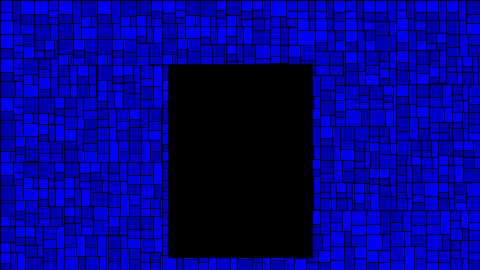

In [ ]:
W=480
H=270
r=8/12
r=(1+np.sqrt(5))/2
r=8/29
r=6/10
thr=10
clock=0
clock_max=60
x=40
y=21
im = Image.new('RGB', (W, H), color=hsv2rgb(0, 255, 0))
draw = ImageDraw.Draw(im)
divRect5(0,0,W,H,r,thr,clock,clock_max)
draw.rectangle((W*(14/x),H*(5/y),W*(26/x),H*(20/y)), fill=(0,0,0))
im

動画の生成

In [ ]:
from PIL import Image, ImageDraw, ImageFont
s=8
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf", 32*s)
W=480*s
H=270*s
thr=10*s
x=40
y=21
time1="05:30:"
time2="07:10:"
time3="13:20:"
time4="17:55:"
time5="22:33:"

r=3/5
ims=[]
for i in range(0,60,1):
  clock=0
  clock_max=(i//5)+1
  im = Image.new('RGB', (W, H), color=hsv2rgb(0, 255, 0))
  draw = ImageDraw.Draw(im)
  divRect1(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W*(14/x),H*(5/y),W*(26/x),H*(20/y)), fill=(0,0,0))
  sec=str(i).zfill(2)
  draw.text((20*s, 20*s), time1+sec, 'white',font=font)
  ims.append(im)

ims[0].save('ay.gif',save_all=True, append_images=ims[1:], optimize=False, duration=1000, loop=0)

r=2/3
ims=[]
for i in range(0,60,1):
  clock=0
  clock_max=(i//5)+1
  im = Image.new('RGB', (W, H), color=hsv2rgb(0, 255, 0))
  draw = ImageDraw.Draw(im)
  divRect2(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W*(14/x),H*(5/y),W*(26/x),H*(20/y)), fill=(0,0,0))
  sec=str(i).zfill(2)
  draw.text((20*s, 20*s), time2+sec, 'white',font=font)
  ims.append(im)

ims[0].save('asa.gif',save_all=True, append_images=ims[1:], optimize=False, duration=1000, loop=0)

r=(1+np.sqrt(5))/2
#ims=[]
for i in range(0,60,1):
  clock=0
  clock_max=(i//5)+1
  im = Image.new('RGB', (W, H), color=hsv2rgb(0, 255, 0))
  draw = ImageDraw.Draw(im)
  divRect3(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W*(14/x),H*(5/y),W*(26/x),H*(20/y)), fill=(0,0,0))
  sec=str(i).zfill(2)
  draw.text((20*s, 20*s), time3+sec, 'white',font=font)
  ims.append(im)

ims[0].save('hiru.gif',save_all=True, append_images=ims[1:], optimize=False, duration=1000, loop=0)

r=2/3
ims=[]
for i in range(0,60,1):
  clock=0
  clock_max=(i//5)+1
  im = Image.new('RGB', (W, H), color=hsv2rgb(0, 255, 0))
  draw = ImageDraw.Draw(im)
  divRect4(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W*(14/x),H*(5/y),W*(26/x),H*(20/y)), fill=(0,0,0))
  sec=str(i).zfill(2)
  draw.text((20*s, 20*s), time4+sec, 'white',font=font)
  ims.append(im)

ims[0].save('yuu.gif',save_all=True, append_images=ims[1:], optimize=False, duration=1000, loop=0)

r=3/5
#ims=[]
for i in range(0,60,1):
  clock=0
  clock_max=(i//5)+1
  im = Image.new('RGB', (W, H), color=hsv2rgb(0, 255, 0))
  draw = ImageDraw.Draw(im)
  divRect5(0,0,W,H,r,thr,clock,clock_max)
  draw.rectangle((W*(14/x),H*(5/y),W*(26/x),H*(20/y)), fill=(0,0,0))
  sec=str(i).zfill(2)
  draw.text((20*s, 20*s), time5+sec, 'white',font=font)
  ims.append(im)

ims[0].save('yoru.gif',save_all=True, append_images=ims[1:], optimize=False, duration=1000, loop=0)


#ims[0].save('all.gif',save_all=True, append_images=ims[1:], optimize=False, duration=1000, loop=0)

In [ ]:
!pip install moviepy
!pip install imageio==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=d62297304fa7c7ba3df9a035918fc14ae5e4eb6d2297d82f24b2bab10dae6f32
  Stored in directory: /root/.cache/pip/wheels/96/5d/ce/bdbdb04744dac03906336eb0d01ff1e222061d3419c55c55f9
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.1
    Uninstalling imageio-2.31.1:
      Successfully uninstalled imageio-2.31.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.


In [ ]:
#ライブラリインポート
import moviepy.editor as mp

In [ ]:
#gif動画ファイルの読み込み
f=mp.VideoFileClip('/content/ay.gif')
#mp4動画ファイルの保存
f.write_videofile('ay.mp4')
f.close()

Moviepy - Building video ay.mp4.
Moviepy - Writing video ay.mp4



Moviepy - Done !
Moviepy - video ready ay.mp4


In [ ]:
#gif動画ファイルの読み込み
f=mp.VideoFileClip('/content/center.gif')
#mp4動画ファイルの保存
f.write_videofile('center.mp4')
f.close()

Moviepy - Building video center.mp4.
Moviepy - Writing video center.mp4



Moviepy - Done !
Moviepy - video ready center.mp4


My　Driveをマウントしてファイルを移動し、DLする


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
